In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from models.orbitLGT import OrbitLGT

In [3]:
df = pd.read_csv(f'../data/ATVI/2021-06-01 - 2021-09-01.csv', index_col=0, parse_dates=['time'], dayfirst=True)
df.head()

,time,price
0,2021-06-01 04:00:00+00:00,97.41
1,2021-06-01 04:15:00+00:00,97.76
2,2021-06-01 04:30:00+00:00,97.99
3,2021-06-01 04:45:00+00:00,97.97
4,2021-06-01 05:00:00+00:00,97.80


In [4]:
test_size = 74
train_df = df[:-test_size]
test_df = df[-test_size:]

In [5]:
lgt = OrbitLGT('time', 'price')

In [6]:
%%time

lgt.fit(train_df)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2af9ff5e07f97061bbe4badb0f8a2e36 NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Wall time: 3min 40s


In [8]:
lgt.predict(test_df)

,time,price
0,2021-08-31 04:00:00,81.303292
1,2021-08-31 04:15:00,81.320836
2,2021-08-31 04:30:00,81.300607
3,2021-08-31 04:45:00,81.328915
4,2021-08-31 05:00:00,81.331898
...,...,...
69,2021-08-31 21:15:00,81.402369
70,2021-08-31 21:30:00,81.495753
71,2021-08-31 21:45:00,81.522976
72,2021-08-31 22:15:00,81.388506


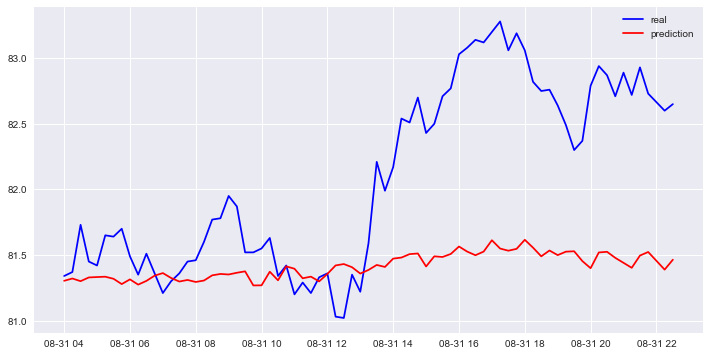

In [9]:
lgt.show()